Source :
1.  https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/
2. https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb


In [1]:
# load the dependencies
import numpy as np
import pandas as pd
import imutils
import cv2 as cv
from google.colab.patches import cv2_imshow 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

# Loading and displaying an image

In [2]:
#load the input image and show its dimensions as multidimensional numpy arrays.
# to read images directly from url.
image = io.imread("https://www.media4.hw-static.com/wp-content/uploads/jurassic-park-movie-stills_5239994-400x305.jpeg")
(h,w,d) = image.shape
print("width={},height={},depth={}".format(w,h,d))

width=400,height=305,depth=3


Displaying image as stored in OpenCV - BGR


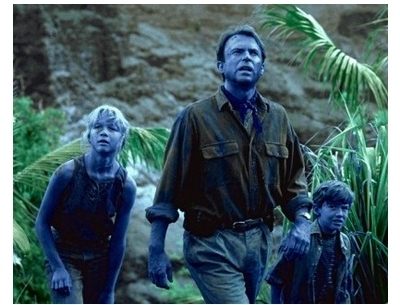

The original image - RGB


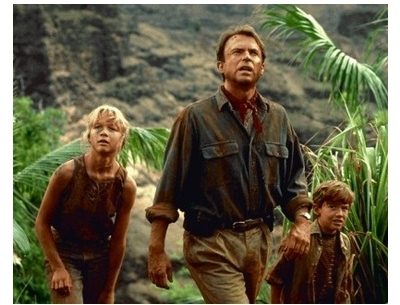

In [18]:
# Since OpenCV stores images as BGR, we get a differnt color tone of the original image
print("Displaying image as stored in OpenCV - BGR")
cv2_imshow(image) 
# The original image we loaded. 
print("The original image - RGB")
cv2_imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [ ]:
# accessing individual located at x=50 and y=100 keeping in mind that opencv stores images in BGR.
# keeping in mind that height is no of rows and width is number of columns.
(B,G,R) = image[50,100]
print("R={},G={},B={}".format(R,G,B))

R=47,G=51,B=52


# Array slicing and cropping 

Extracting **"region of Interest"** **(ROIs)** is an important skill for image processing. First, you'd run a face detection algorithm tofind the co-ordinate of face in all the frames you are working with. Then you'd want to extract the face ROIs and either save them or process them. Locating all frame containing Dr. Ian Malcolm in Jurassic Park would be a great recognition mini-project to work on. \
Now lets just manually extract an array slicing.

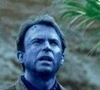

In [10]:
roi = image[10:100,200:300]
cv2_imshow(roi)

# Resizing Images

Resizing images is important for a number of reasons. First, you might want to resize a large image to fit on your screen. Image processing is also faster on smaller images because there are fewer pixels to process. In the case of deep learning we often resize images, ignoring aspect ratio, so that the volume fits into a network, which requires the image to be a square and a certain dimension.

The resized image


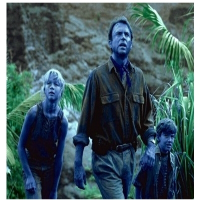

The original image


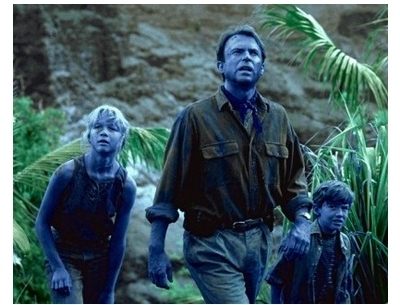

In [15]:
revised = cv.resize(image,(200,200))
print("The resized image")
cv2_imshow(revised);
print("The original image")
cv2_imshow(image)

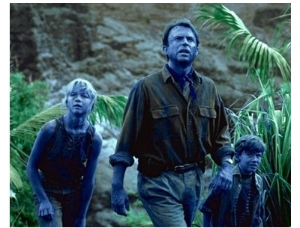

In [16]:
"""Let's calculate the aspect ratio of the original image and use it to resize the image, so that the distortions can be avoided"""
r = 300/w
dim = (300,int(h*r))
revised = cv.resize(image,dim)
cv2_imshow(revised)

# Rotating an image
Lets rotate an image 45 degrees clockwise using opencv by first computing the image center, then constructing the rotation matrices, and then finally applying the affine wrap.


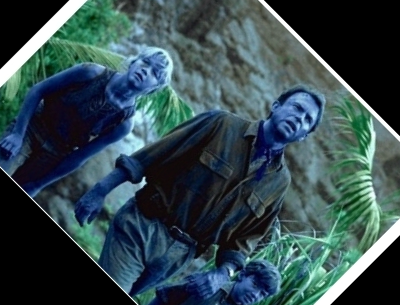

In [3]:
center = (w//2, h//2)
m = cv.getRotationMatrix2D(center,-45,1.0)
rotated = cv.warpAffine(image,m,(w,h))
cv2_imshow(rotated)

# Smoothing of an image
In many image processing pipelines we must blurr an image to reduce the high frequency noise, making it easier for our algorithms to detect and understand the actual contents of the image rather than just noise that will "confuse" our algorithms.

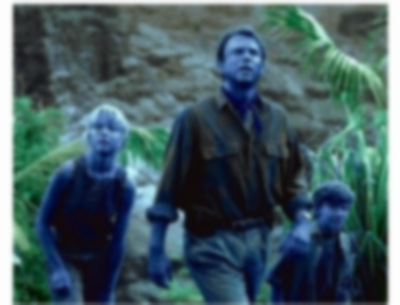

In [4]:
# apply a Gaussian blur with a 11*11 kernel to the image to smooth it. 
# useful for reducing high frequency noise
blurred = cv.GaussianBlur(image,(11,11),0)
cv2_imshow(blurred)

#Drawing on an Image

In this section, we are going to draw a rectangle, circle and line on an input image.
Before we move on with drawging on an image with OpenCV, take note that drawing operations on images are performed in-place. Therefore, at the beginning of each code block, we make a copy of the original image storing the copy as output. We then proceed to draw on the image called output.

cv.rectange\
: img : The destination image to draw upon on output\
: pt1 : Our starting pixel co-ordinate which s top-left.\
: pt2 : The ending pixel - bottom right.\
: color : BGR Tuple. To represent green(0,255,0)\
: Thickness : Line thickness (a negative value) will make a solid rectangle.

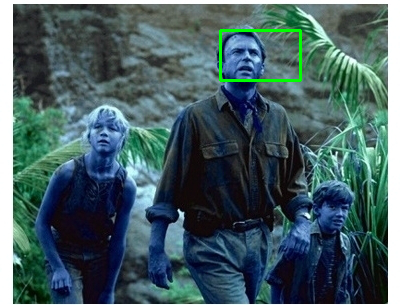

In [12]:
#draw a 2px thick rectange surrounding the face.
output = image.copy()
cv.rectangle(output,(220,30),(300,80),(0,255,0),2)
cv2_imshow(output)

cv.circle\
: img : the output image\
: center : Our circle center co-ordinate\
: radius : The circle radius in pixels\
: Color : Circle color\
: thickness : The line thickness. Since I supplied a negative value (-1), the circle is solid/filled in.

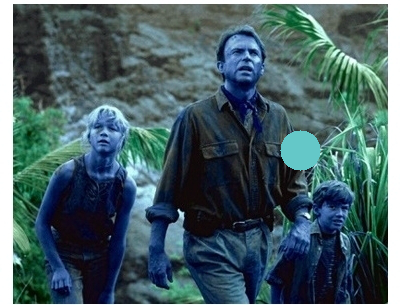

In [16]:
#draw a blue 20px (filled in ) circle on the image centered at  x=300, y = 150.
output = image.copy()
cv.circle(output,(300,150),20,(200,200,100),-1)
cv2_imshow(output)

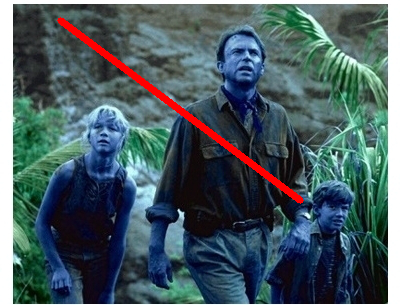

In [20]:
#draw a blue 5px thick red line from  x=60, y = 20  to x = 400, y = 200.
output = image.copy()
cv.line(output,(60,20),(300,200),(0,0,255),5)
cv2_imshow(output)